# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [3]:
# Your code here
def alpha_func(D, idx):
    sepal_length = D['Sepal.Length'].iloc[idx]
    sepal_width = D['Sepal.Width'].iloc[idx]
    alpha = (np.var(sepal_length) - np.var(sepal_width)) / (np.var(sepal_length) + np.var(sepal_width))
    return alpha

Test the code below

In [4]:
alpha_func(df, range(100))

0.28485969761629365

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [8]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

# Recompute alpha with a bootstrap sample
bootstrap_alpha = alpha_func(df, rng.choice(100, 100, replace=True))
print(bootstrap_alpha)

0.2387245222670081


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Sepal.Length gives us a point estimate, but it does not provide information about the variability or uncertainty of this estimate. Bootstrapping allows us to estimate the sampling distribution of the mean, giving us more insight into the precision and reliability of our estimate by providing confidence intervals and standard errors.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [9]:
# Add your code here to set the seed
np.random.seed(42)

# Define the boot_SE function to calculate bootstrap standard error
def boot_SE(data, B=1000):
    n = len(data)
    boot_samples = np.random.choice(data, (B, n), replace=True)
    boot_means = np.mean(boot_samples, axis=1)
    boot_se = np.std(boot_means)
    return boot_means, boot_se


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [10]:
# Your code here
B = 1000
boot_means, boot_se = boot_SE(df['Sepal.Length'].values, B)
print(f"Bootstrap standard error: {boot_se}")

Bootstrap standard error: 0.06702629798652003


_(vi)_ What is the original mean value of `Sepal.Length`?

In [11]:
# Your code here
original_mean = np.mean(df['Sepal.Length'])
print(f"Original mean of Sepal.Length: {original_mean}")

Original mean of Sepal.Length: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [12]:
# Add your code here
# Bootstrapped mean and standard deviation
boot_mean = np.mean(boot_means)
boot_std = np.std(boot_means)
print(f"Bootstrapped mean: {boot_mean}")
print(f"Bootstrapped standard deviation: {boot_std}")

# Compare the mean against its original value
print(f"Difference between original mean and bootstrapped mean: {original_mean - boot_mean}")

# Review the bootstrapped range
t_range = np.ptp(boot_means)
print(f"Bootstrapped range: {t_range}")

Bootstrapped mean: 5.844700666666666
Bootstrapped standard deviation: 0.06702629798652003
Difference between original mean and bootstrapped mean: -0.0013673333333326099
Bootstrapped range: 0.46200000000000063


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [13]:
# Add your code here
# Compute 95% confidence intervals
confidence_interval = np.percentile(boot_means, [2.5, 97.5])
print(f"95% confidence interval for Sepal.Length mean: {confidence_interval}")

95% confidence interval for Sepal.Length mean: [5.71063333 5.97268333]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

The histogram shows how the mean Sepal.Length varies across different bootstrap samples, providing insights into the precision and reliability of the mean estimate.

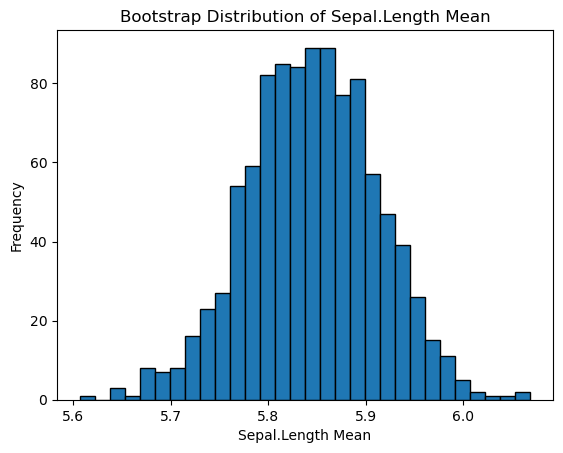

In [14]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_means, bins=30, edgecolor='black')

# Add a title
#Add your code here
ax.set_title('Bootstrap Distribution of Sepal.Length Mean')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Sepal.Length Mean')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [15]:
# Write your answer here

print("I recommend using the bootstrapped mean and its confidence interval for planning space allotment for iris flowers.\nThe bootstrapped mean provides a reliable estimate, and the confidence interval gives a range that accounts for variability, ensuring more accurate and informed decisions.")

I recommend using the bootstrapped mean and its confidence interval for planning space allotment for iris flowers.
The bootstrapped mean provides a reliable estimate, and the confidence interval gives a range that accounts for variability, ensuring more accurate and informed decisions.


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
